In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("./germany_used_cars_mod.csv")

df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,mileage_in_km,fuel_consumption_l_100km_numeric
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148,201,Manual,Petrol,160500.0,10.9
1,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110,150,Manual,Petrol,189500.0,9.5
2,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132,179,Manual,Petrol,96127.0,7.2
3,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900.0,110,150,Manual,Petrol,47307.0,9.5
4,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500.0,110,150,Manual,Petrol,230000.0,8.8


In [3]:
df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'mileage_in_km', 'fuel_consumption_l_100km_numeric'],
      dtype='object')

In [5]:
df.describe()

,year,price_in_euro,power_kw,power_ps,mileage_in_km,fuel_consumption_l_100km_numeric
count,223733.000000,2.237330e+05,223733.000000,223733.000000,2.237330e+05,223733.000000
mean,2016.130513,2.515345e+04,124.294945,169.075237,8.753142e+04,7.219975
std,5.441953,3.491210e+04,69.291811,94.183470,7.913558e+04,18.614586
min,1995.000000,1.200000e+02,4.000000,5.000000,0.000000e+00,0.000000
25%,2013.000000,1.169000e+04,81.000000,110.000000,2.670600e+04,4.900000
50%,2017.000000,1.930000e+04,110.000000,150.000000,7.028200e+04,5.700000
75%,2020.000000,2.899900e+04,140.000000,190.000000,1.300000e+05,6.800000
max,2023.000000,5.890500e+06,735.000000,999.000000,3.800000e+06,739.000000


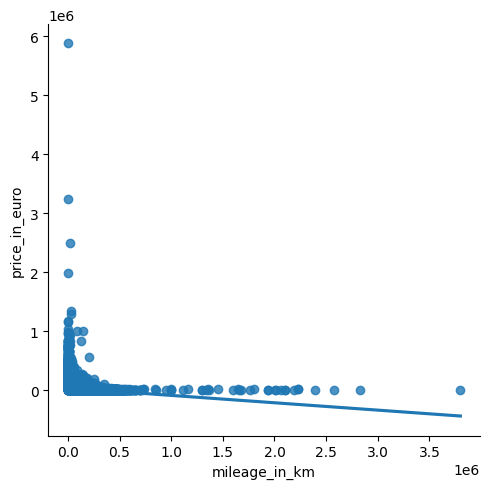

In [13]:
sns.lmplot(x='mileage_in_km', y='price_in_euro', data=df)

## Decision Tree Regresor

In [2]:
y = df[['price_in_euro']] #vytvaranie dataframe do premennej
X = df[['power_kw', 'year','mileage_in_km', 'fuel_consumption_l_100km_numeric']]

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [4]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(223733, 4) (223733, 1)
(134239, 4) (134239, 1)
(44747, 4) (44747, 1)
(44747, 4) (44747, 1)


In [5]:
from sklearn import tree

model = DecisionTreeRegressor(max_depth=20, min_samples_split=10)
model.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=20, min_samples_split=10)

In [6]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse_2 = mean_squared_error(y_test, y_pred, squared = False)

print("R-squared: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE 2: ", rmse_2)

R-squared:  0.7536611431037764
MAE:  5135.154907668986
MSE:  210856667.6210249
RMSE:  14520.90450423199
RMSE 2:  14520.90450423199


In [8]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for train, test in cv.split(X, y):
    X_train, y_train = X.loc[train], y.loc[train]
    X_test, y_test = X.loc[test], y.loc[test]
    print(X_train.shape, X_test.shape)

(178986, 4) (44747, 4)
(178986, 4) (44747, 4)
(178986, 4) (44747, 4)
(178987, 4) (44746, 4)
(178987, 4) (44746, 4)


## Linear Regresion

In [2]:
y = df[['price_in_euro']] #vytvaranie dataframe do premennej
X = df[['power_kw', 'year','mileage_in_km', 'fuel_consumption_l_100km_numeric']]

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [5]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(X_test)

In [8]:
print('from scikit-learn:')
print('intercept:', lr.intercept_)
print('coef:', lr.coef_)

from scikit-learn:
intercept: [-1627968.67209513]
coef: [[ 3.01910317e+02  8.04579016e+02 -7.46819677e-02  7.71205699e+00]]


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse_2 = mean_squared_error(y_test, y_pred, squared = False)

print("R-squared: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE 2: ", rmse_2)

R-squared:  0.5587858113799984
MAE:  8967.483332731501
MSE:  377662520.20370585
RMSE:  19433.54111333562
RMSE 2:  19433.54111333562
